In [176]:
from pymongo import MongoClient
client = MongoClient()

In [177]:
db = client['reddit']

In [178]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'reddit')

In [179]:
subreddits = db.subreddits

In [180]:
subreddits.find_one({"type": "public"})

{'_id': '006',
 'description': '006',
 'keywords': ['006'],
 'subscribers': 2,
 'timestamp': '2017-11-25 23:54:38',
 'type': 'public'}

In [181]:
cur = subreddits.find({"$or": [{"type": "public"}, {"type": "nsfw"}]})

In [182]:
reds = list(cur)

In [183]:
from collections import defaultdict
keyword_occurrences = defaultdict(lambda: 0)

for red in reds:
    for keyword in red['keywords']:
        keyword_occurrences[keyword] += 1
        

In [184]:
top_keywords = sorted(
    keyword_occurrences.items(), 
    key=lambda x: x[1],
    reverse=True,
)


In [206]:
def get_record(record, top=500):
    result = {}
#     result['id'] = record['_id']
    result['subscribers'] = record['subscribers']
    for top_keyword, _count in top_keywords[:top]:
        if top_keyword in record['keywords']:
            result[top_keyword] = 1
        else:
            result[top_keyword] = 0
    return result

# get_record(subreddits.find_one({"type": "public"}))

In [186]:
filtered_reds = [red for red in reds if red['type'] in ('nsfw', 'public')]xss, yss = zip(*transformed)
plt.figure(figsize=(25, 25))
plt.scatter(xss, yss, c=Y)

In [187]:
sum([red['type'] == 'nsfw' for red in filtered_reds])

7531

In [318]:
X = [get_record(red) for red in filtered_reds]
Y = [red['type'] == 'public' for red in filtered_reds]


In [189]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=5,
)

In [190]:
import pandas as pd

df = pd.DataFrame(X)

In [191]:
print(df)

       1  2  3  4  across  action  active  advancing  adventure  advice  \
0      0  0  0  0       0       0       0          0          0       0   
1      0  0  0  0       0       0       0          0          0       0   
2      0  0  0  0       0       0       0          0          0       0   
3      0  0  0  0       0       0       0          0          0       0   
4      0  0  0  0       0       0       0          0          0       0   
5      0  0  0  0       0       0       0          0          0       0   
6      0  0  0  0       0       0       0          0          0       0   
7      0  0  0  0       0       0       0          0          0       0   
8      0  0  0  0       0       0       0          0          0       0   
9      0  0  0  0       0       0       0          0          0       0   
10     0  0  0  0       0       0       0          0          0       0   
11     0  0  0  0       0       0       0          0          0       0   
12     0  0  0  0       0

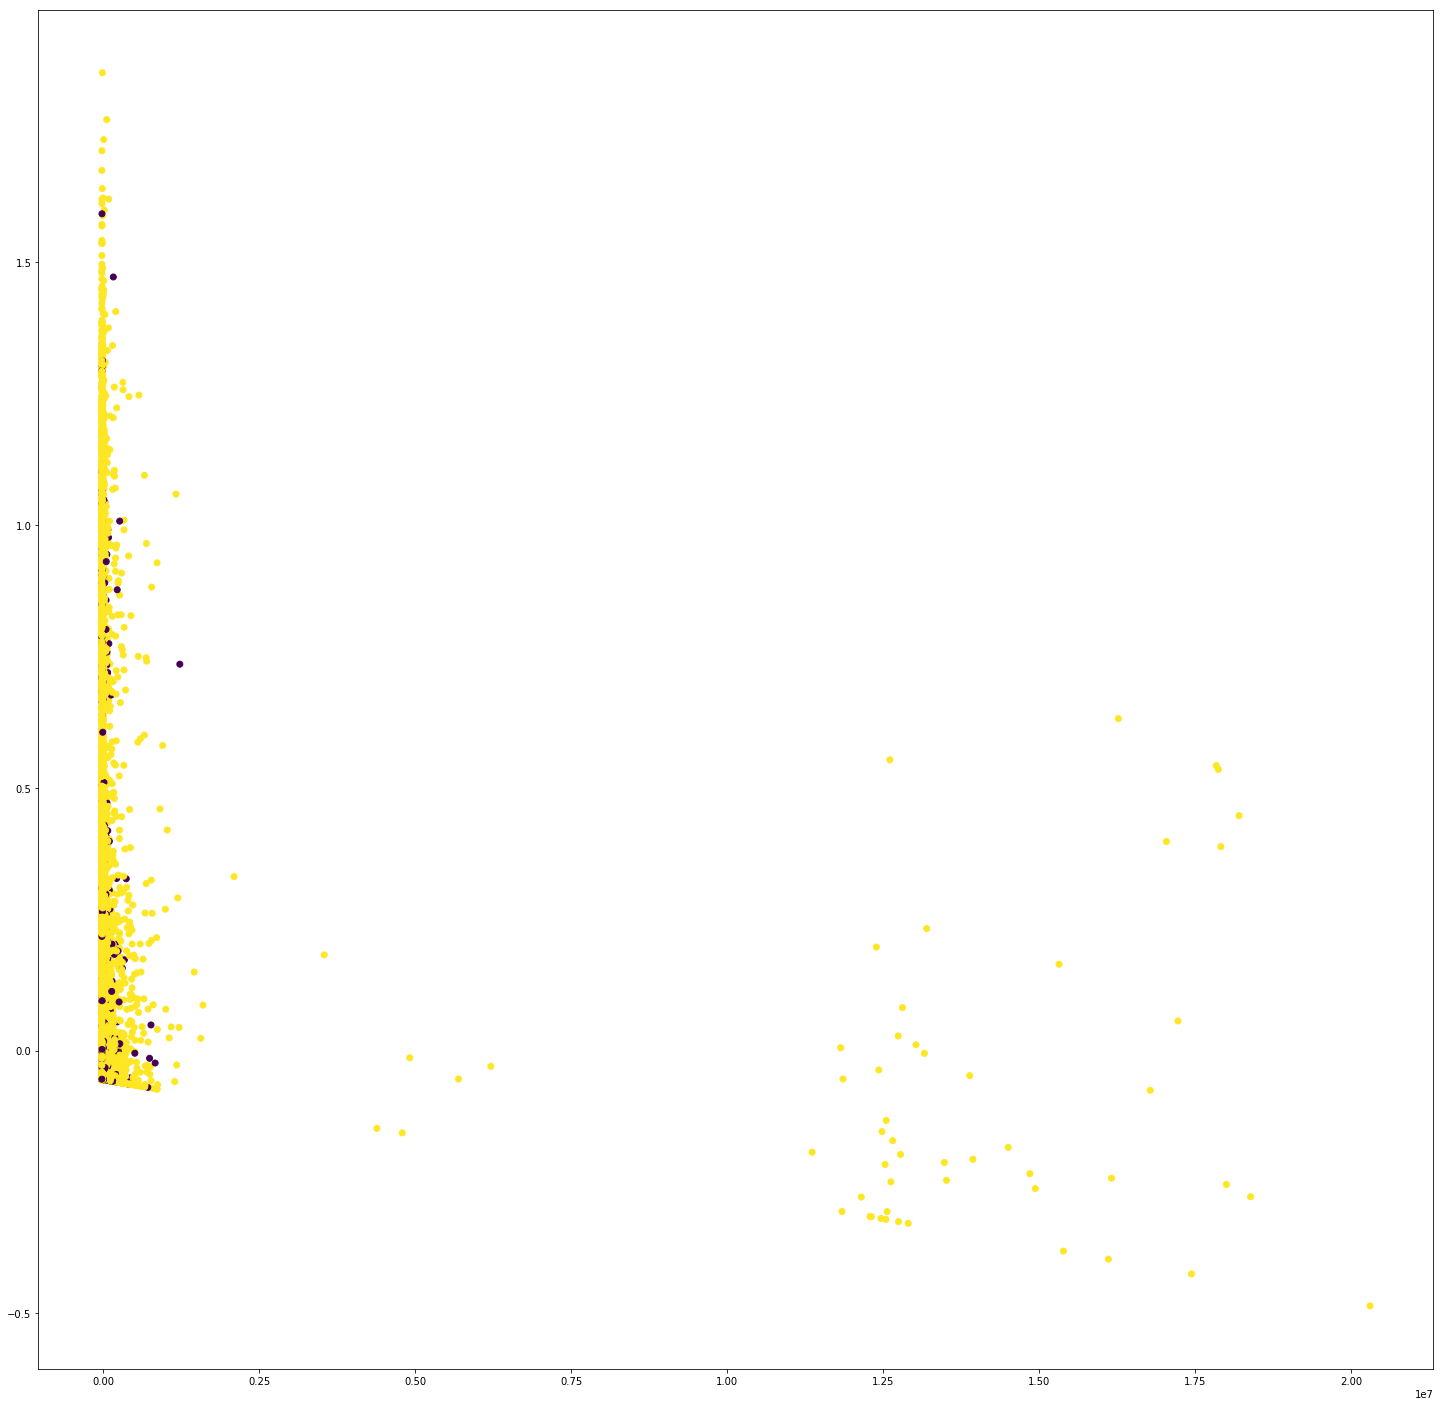

In [202]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# result = tsne.fit_transform(df)
pca = PCA(n_components=2)
pca.fit_transform(df)
xs,ys = zip(*pca_res)
fig = plt.figure(figsize=(25, 25))

plt.scatter(xs, ys, c=Y)

In [199]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 2.12858392e-13]


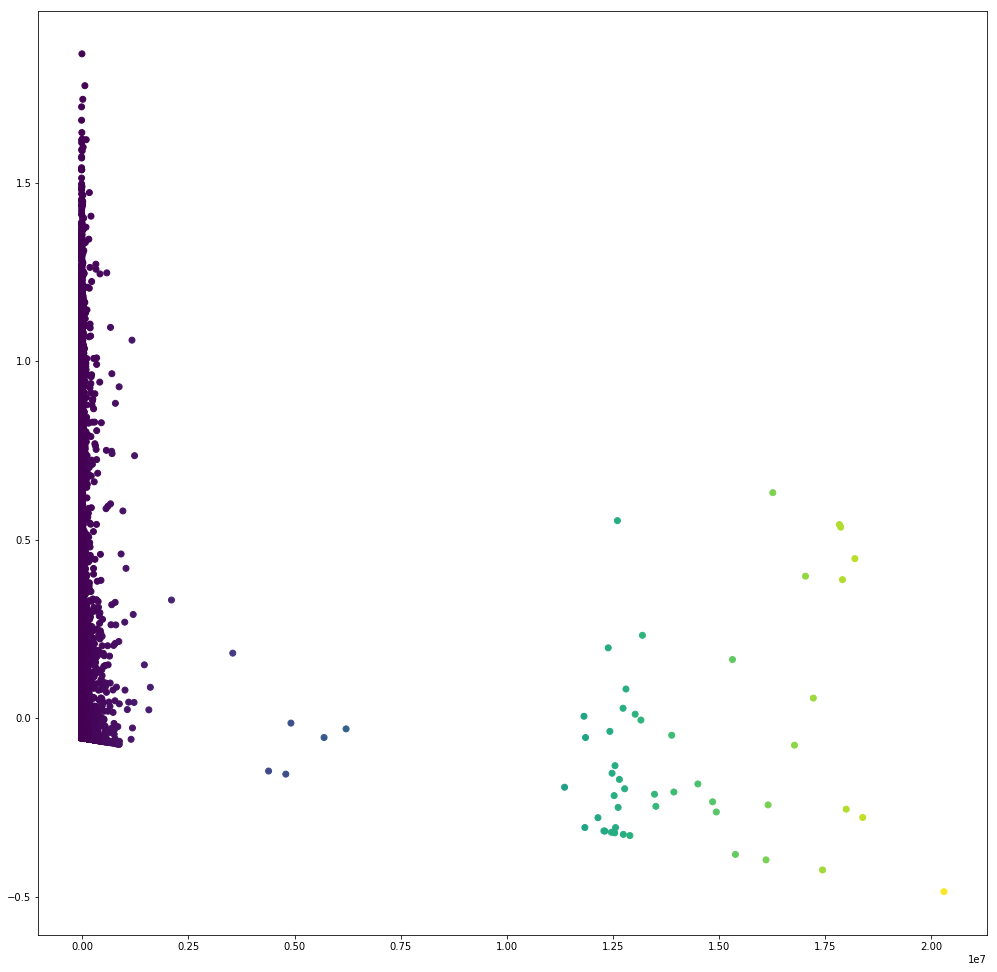

In [205]:
cols = [red['subscribers'] for red in filtered_reds]
plt.figure(figsize=(17, 17))
plt.scatter(xs, ys, c=cols)

In [315]:
X = [get_record(rec, top=100) for rec in filtered_reds]

In [316]:
from time import time
tsne = TSNE(
    n_components=2,
    n_iter = 1000,
)
df = pd.DataFrame(X)

print(time())
transformed = tsne.fit_transform(df)
print(time())


1522155070.8161888
1522156349.7380357


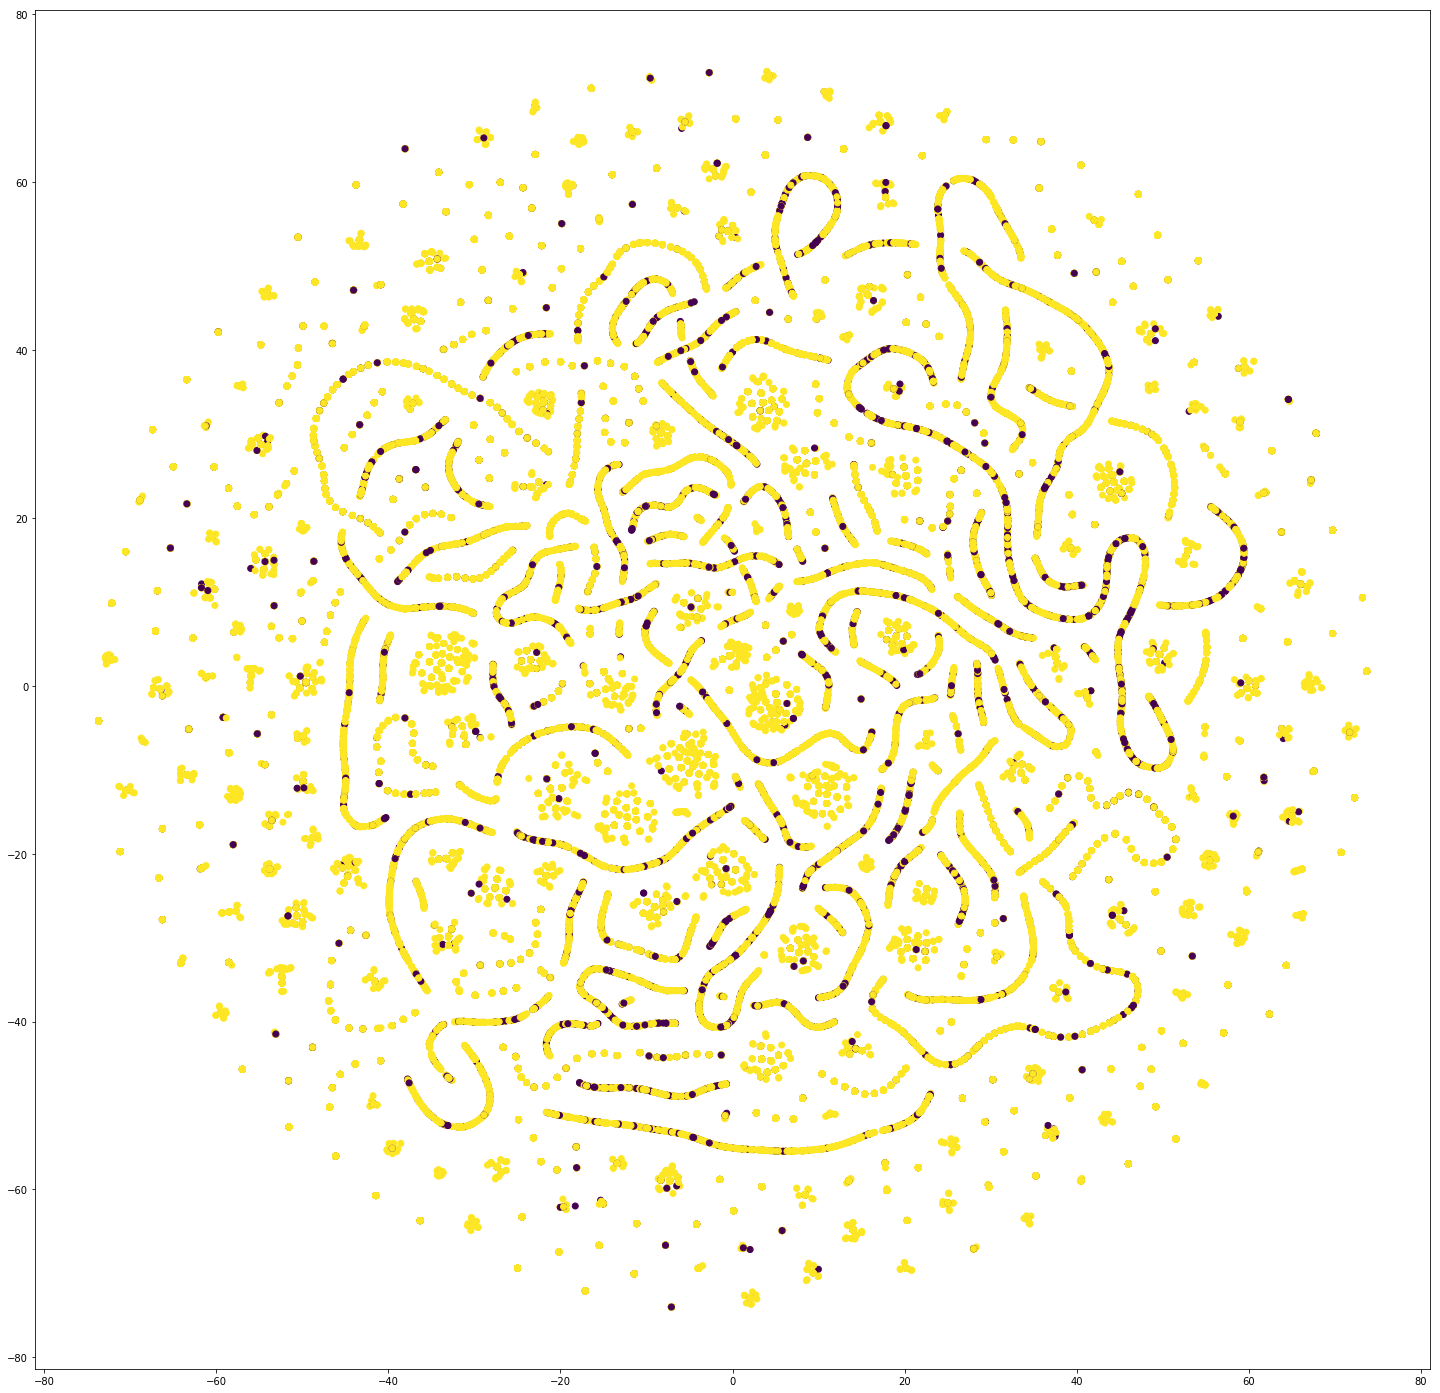

In [319]:
xss, yss = zip(*transformed)
plt.figure(figsize=(25, 25))
plt.scatter(xss, yss, c=Y)

In [221]:
from time import time
tsne = TSNE(
    n_components=2,
    n_iter = 250,
    learning_rate=800,
    perplexity=10
)
df = pd.DataFrame(X)

print(time())
transformed = tsne.fit_transform(df)
print(time())


1522150548.9907496
1522150863.2405207


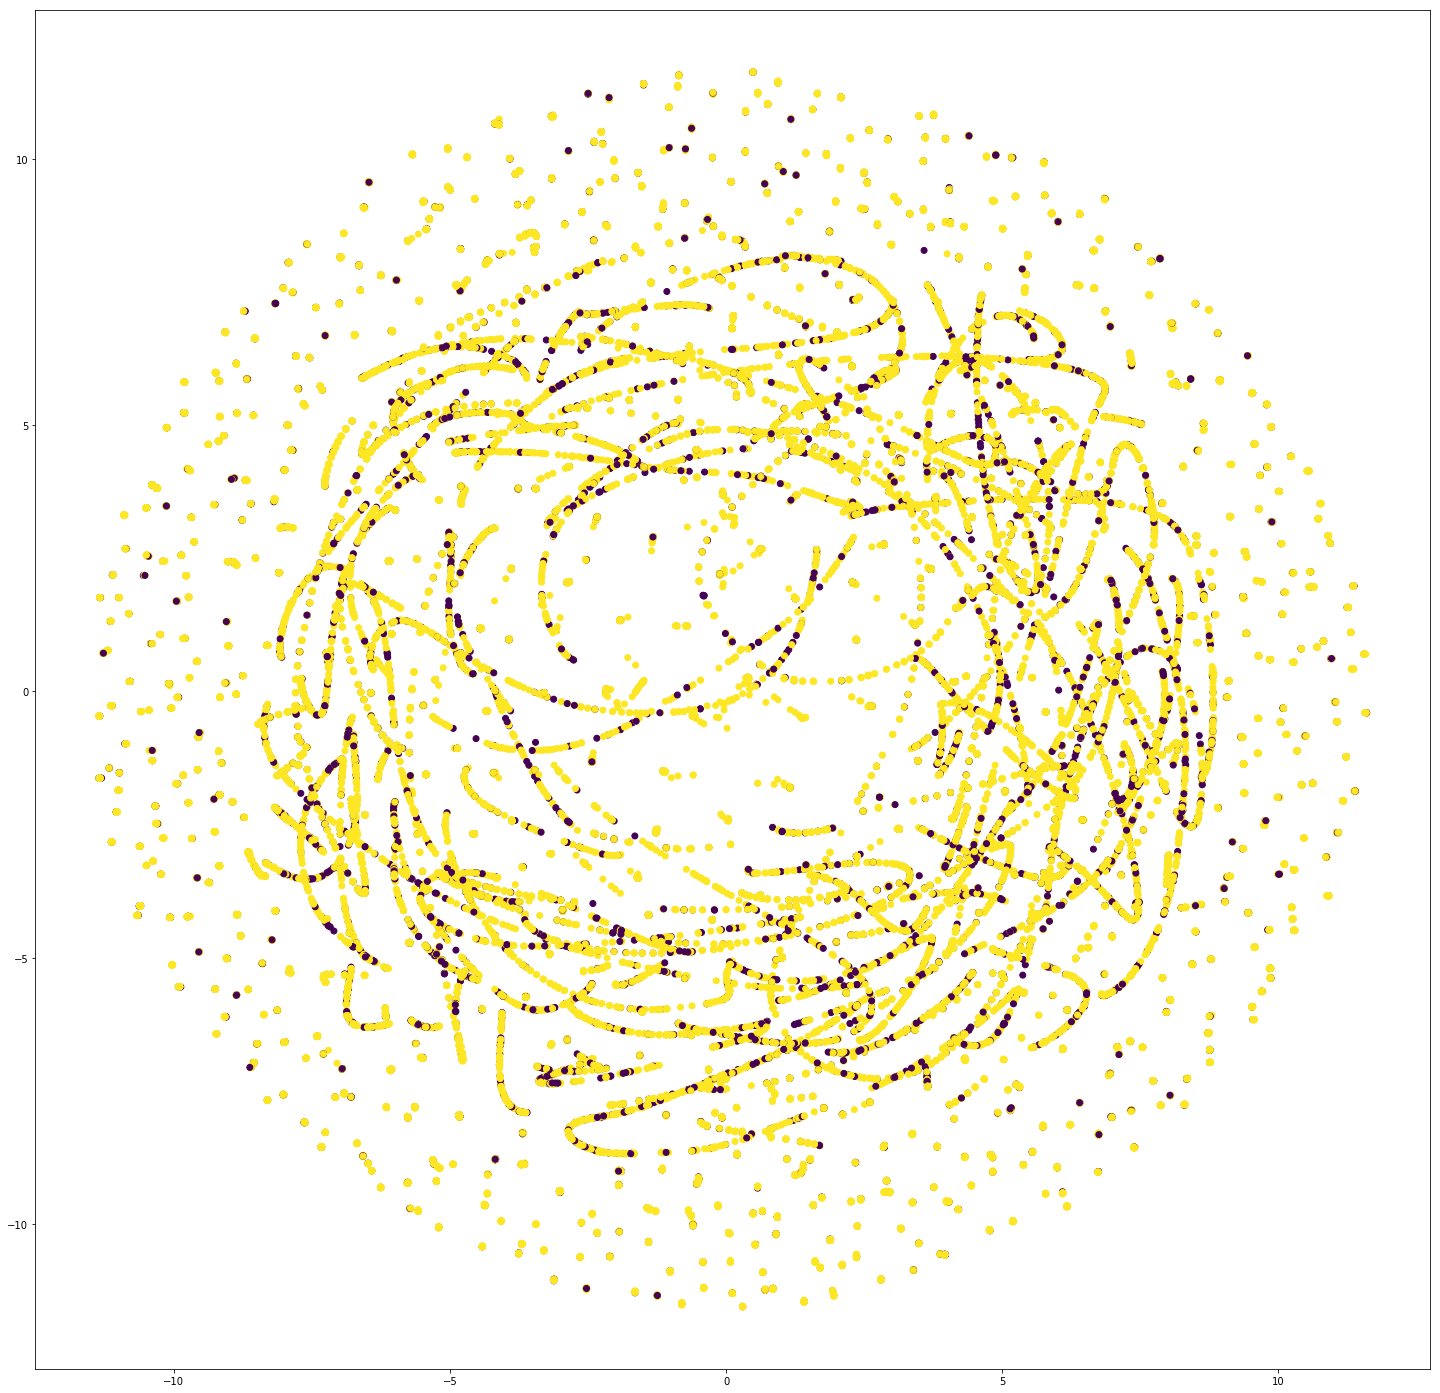

In [224]:
xss, yss = zip(*transformed)
plt.figure(figsize=(25, 25))
plt.scatter(xss, yss, c=Y)

In [265]:
def keyword_metric(x,y):
    x,y = set(x[1].split("|")), set(y[1].split("|"))
    return len(x.intersection(y))

In [271]:
def remove_meta(subreddit):
    subred = dict(subreddit)
    subred.pop('_id', None)
    subred.pop('description', None)
    subred.pop('timestamp', None)
    subred.pop('type', None)
    keys = subred['keywords']
    subred['keywords'] = "|".join(keys)
    return [subred['subscribers'], subred['keywords']]
    


In [281]:
filtered_reds = [red for red in reds if red['type'] in ('nsfw', 'public')]

public_limit = 1e4
Y = []
reduced_data = []

for red in filtered_reds:
    if red['type'] == 'public' and public_limit > 0:
        reduced_data.append(red)
        public_limit -= 1
        Y.append(1)
    elif red['type'] =='nsfw':
        Y.append(0)
        reduced_data.append(red)

In [282]:
len(reduced_data)

17531

In [286]:
keywordX = [remove_meta(red) for red in reduced_data]

In [287]:
df = pd.DataFrame(keywordX)
# print(df)

In [289]:
from tqdm import tqdm

distances = []
for x in tqdm(keywordX):
    row = []
    for y in keywordX:
        row.append(keyword_metric(x, y))
    distances.append(row)



  1%|          | 212/17531 [00:05<07:17, 39.59it/s]Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib64/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/maciej/.virtualenvs/wdzd/lib/python3.6/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/home/maciej/.virtualenvs/wdzd/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 17531/17531 [06:56<00:00, 42.13it/s]


In [291]:
import numpy as np

tsne = TSNE(
    n_components=2,
    n_iter = 250,
    learning_rate=50,
    perplexity=10,
    metric='precomputed',
)
distances = np.array(distances)
print(time())
transformed = tsne.fit_transform(distances)
print(time())



1522153702.58862
1522153799.409943


/home/maciej/.virtualenvs/wdzd/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


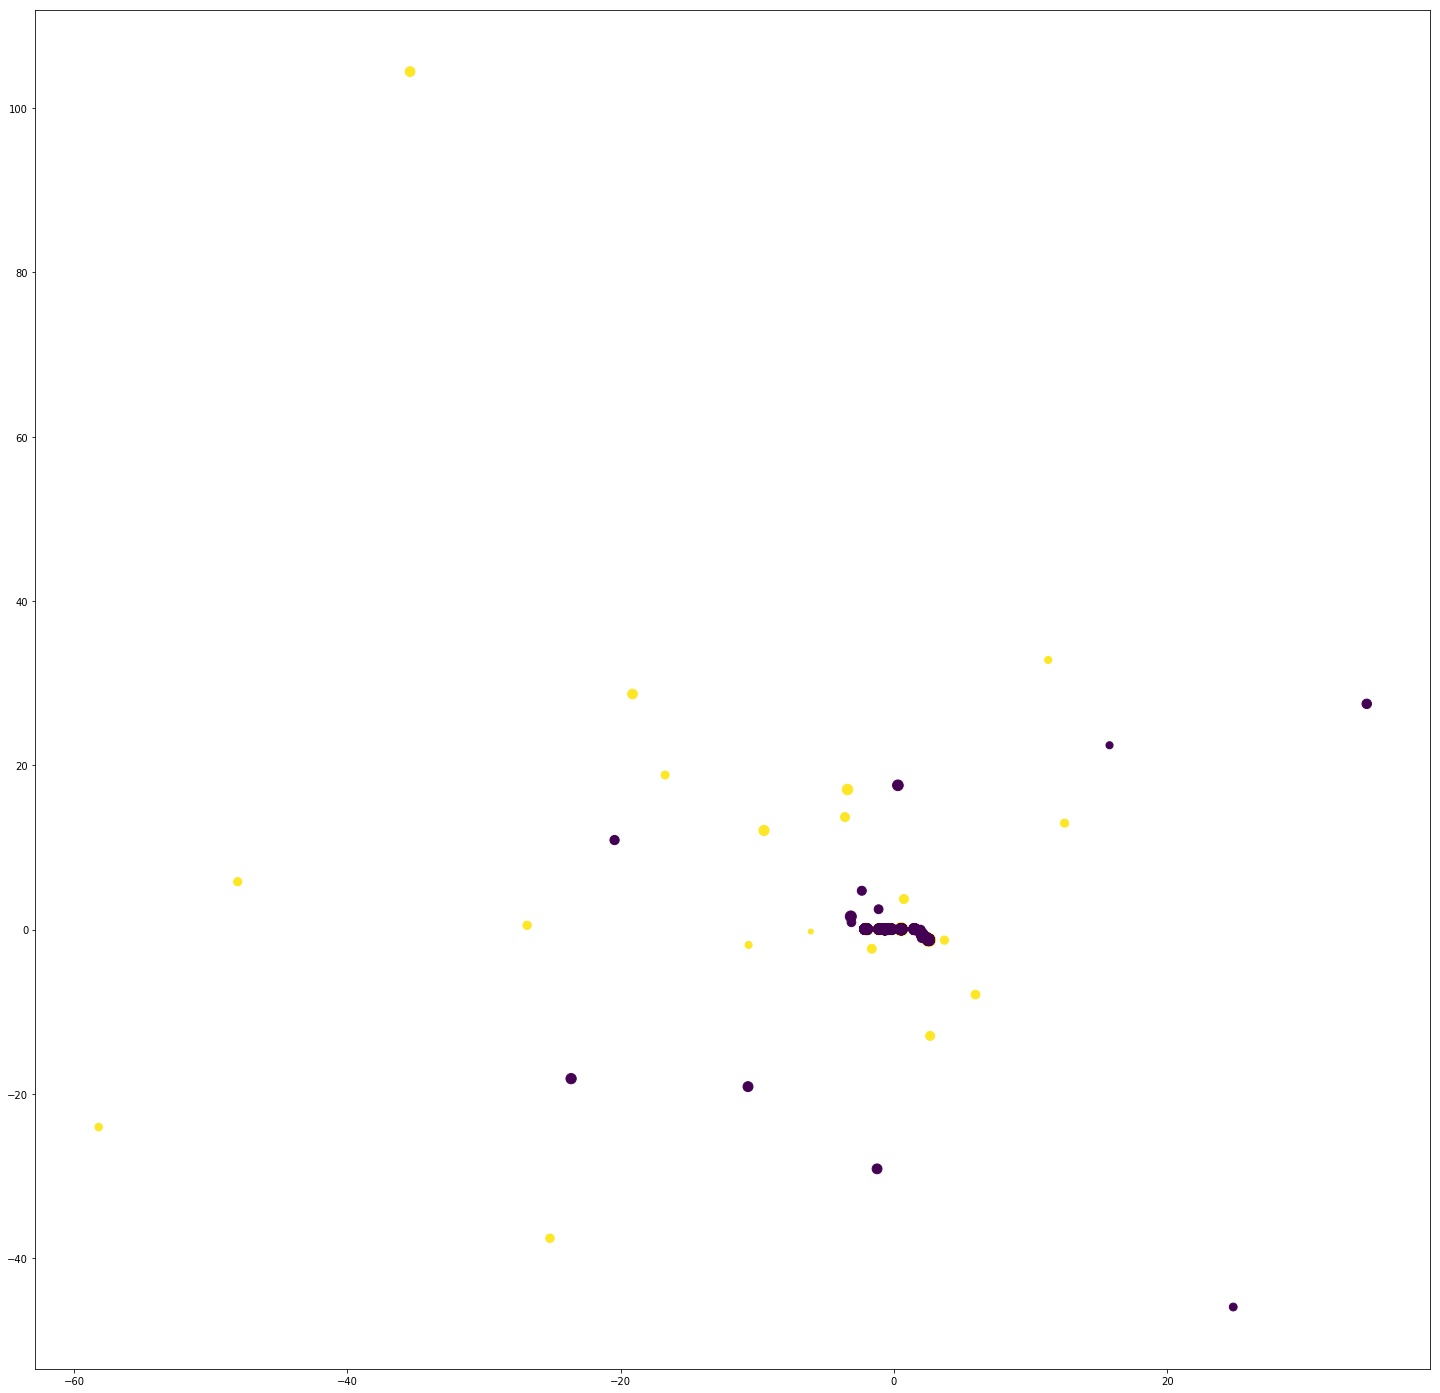

In [314]:
xxx,yyy = zip(*transformed)
cols = [np.log(key['subscribers'])*10 for key in reduced_data]
plt.figure(figsize=(25, 25))
plt.scatter(xxx, yyy, c=Y, s=cols)
